# The comparison of the mean scores of those who do more than 6 activities out of 12 and those who do less.(The effect of activity diversity on success)

I imported necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/pisa_data.csv')

In [ ]:
data.head()

,CNTSCHID,LANGTEST,SC001Q01TA,SC013Q01TA,SC016Q01TA,SC016Q02TA,SC016Q03TA,SC016Q04TA,SC017Q01NA,SC017Q02NA,SC017Q03NA,SC017Q04NA,SC017Q05NA,SC017Q06NA,SC017Q07NA,SC017Q08NA,SC161Q01SA,SC161Q02SA,SC161Q03SA,SC161Q04SA,SC161Q05SA,SC162Q01SA,SC155Q01HA,SC155Q02HA,SC155Q03HA,SC155Q04HA,SC155Q05HA,SC155Q06HA,SC155Q07HA,SC155Q08HA,SC155Q09HA,SC155Q10HA,SC155Q11HA,SC156Q01HA,SC156Q02HA,SC156Q03HA,SC156Q04HA,SC156Q05HA,SC156Q06HA,SC156Q07HA,...,SC053Q16IA,SC053D11TA,SC150Q01IA,SC150Q02IA,SC150Q03IA,SC150Q04IA,SC150Q05IA,SC164Q01HA,SC064Q01TA,SC064Q02TA,SC064Q03TA,SC064Q04NA,SC152Q01HA,SC160Q01WA,SC052Q01NA,SC052Q02NA,SC052Q03HA,PRIVATESCH,SCHLTYPE,STRATIO,SCHSIZE,RATCMP1,RATCMP2,TOTAT,PROATCE,PROAT5AB,PROAT5AM,PROAT6,CLSIZE,CREACTIV,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,Country,Score
0,800002,140.0,1.0,1.0,95.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,8002,2.0,2.0,2.0,2.0,2.0,0.0,70.0,70.0,100.0,0.0,2.0,NaN,2.0,2.0,2.0,public,3.0,NaN,NaN,NaN,0.0000,26.0,0.0000,0.0000,0.1154,0.0,18.0,1.0,1.2478,-1.4551,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,Albania,419.7
1,800003,140.0,1.0,1.0,NaN,NaN,100.0,NaN,1.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,2.0,8002,1.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,public,3.0,NaN,NaN,NaN,NaN,6.0,1.0000,0.3333,0.3333,0.0,13.0,1.0,0.6221,-1.4551,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,Albania,419.7
2,800004,140.0,1.0,1.0,100.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,2.0,8002,1.0,1.0,1.0,1.0,1.0,1.0,62.0,80.0,60.0,90.0,1.0,1.0,1.0,1.0,1.0,public,3.0,9.7619,205.0,0.0000,NaN,21.0,1.0000,0.5238,0.4762,0.0,18.0,2.0,0.4591,-1.4551,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,Albania,419.7
3,800005,140.0,2.0,1.0,100.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,2.0,8001,2.0,2.0,2.0,2.0,2.0,1.0,65.0,60.0,58.0,55.0,1.0,3.0,2.0,1.0,1.0,public,3.0,NaN,NaN,NaN,0.3333,34.5,0.6087,0.3623,0.6377,0.0,23.0,1.0,1.3065,1.2432,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,Albania,419.7
4,800006,140.0,2.0,1.0,100.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,4.0,2.0,2.0,2.0,4.0,3.0,4.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,8001,2.0,2.0,2.0,2.0,2.0,NaN,97.0,97.0,99.0,2.0,1.0,3.0,2.0,2.0,1.0,public,3.0,18.0000,315.0,0.0256,1.0000,17.5,1.0000,0.0000,0.1714,0.0,38.0,3.0,-0.2376,-1.4551,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,Albania,419.7



Retrieval of the relevant part of the data

In [ ]:
# öncelikle veriyi class size ve ilgili sorunun sütunları olacak şekilde bölüyorum.
columns = ['SC053Q01TA', 'SC053Q02TA', 'SC053Q03TA', 'SC053Q04TA',
       'SC053Q12IA', 'SC053Q13IA', 'SC053Q09TA', 'SC053Q10TA', 'SC053Q14IA',
       'SC053Q15IA', 'SC053Q16IA','Score']
sub_data = data[columns]

In [ ]:
sub_data

,SC053Q01TA,SC053Q02TA,SC053Q03TA,SC053Q04TA,SC053Q12IA,SC053Q13IA,SC053Q09TA,SC053Q10TA,SC053Q14IA,SC053Q15IA,SC053Q16IA,Score
0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,419.7
1,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,419.7
2,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,419.7
3,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,419.7
4,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,419.7
...,...,...,...,...,...,...,...,...,...,...,...,...
22555,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,481.7
22556,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,481.7
22557,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,481.7
22558,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,481.7


Normally the values are 1.0 for 'Yes' and 2.0 for 'No'. I changed the value from 2.0 to 0.0.

In [ ]:
#Normalde 1.0 evet için 2.0 hayır için fakat bunu değiştirip hayır için olanı 0 yapacağm

activity_columns = ["SC053Q01TA","SC053Q02TA",	"SC053Q03TA",	"SC053Q04TA",	"SC053Q12IA",	"SC053Q13IA",	"SC053Q09TA",	"SC053Q10TA",	"SC053Q14IA"	,"SC053Q15IA",	"SC053Q16IA"]
for i in activity_columns:
  sub_data[i][sub_data[i] == 2.0] = 0.0



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, valu

I summed the first 11 columns for each row and create a new column that called 'Activity Sum' with that value.

In [ ]:
#şimdi her row için ilk 11 sütunu toplayıp yeni bir sütuna ekleyeceğim

sub_data['Activity Sum'] = sub_data[sub_data.columns[0:11]].sum(axis = 1, skipna = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


I did two filtering as activity sum less than 6 and more than 6 and I found their mean score.

In [ ]:
# Activity sum ı 6 dan küçük olanlar, 6 ve altıdan büyük olarak iki filtreleme yapacağım ve bunarın mean class size ını bulacağım

less_than_6 = sub_data['Score'][sub_data['Activity Sum'] <= 6].mean()

more_than_6 =  sub_data['Score'][sub_data['Activity Sum'] > 6].mean()


In [ ]:
less_than_6

454.64848898755724

In [ ]:
more_than_6

464.3981560022478

In visualization part I used seaborn barplot for comparing.

In [ ]:
x = ['Less than 6 activities','More than 6 activities']
y = []
y.append(less_than_6)
y.append(more_than_6)

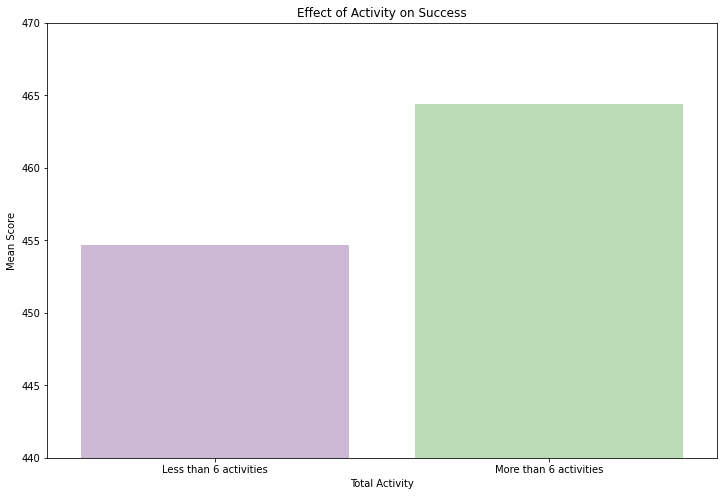

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x= x , y = y,palette = 'PRGn')
plt.ylim([440,470])
plt.xlabel('Total Activity')
plt.ylabel('Mean Score')
plt.title('Effect of Activity on Success')
plt.show()